### Overview 

We believe the Excel Guru was wrong and you can see below the analysis + supporting visuals.

He is assuming that green status is the only thing contributing to the higher rent and not looking at buildings of similar size, age, local market rent, etc. when he claims this building will have $650,000 of extra revenue over a non-green building. Once you control for all those variables, there isn't evidence to suggest that green buildings command higher rent as you can see in the below plots.

In order to improve this analysis, he should compare the building in question with the rent of other non-green buildings nearby that have similar size/number of stories/class, etc. and use that to come up with his calculations.

In [15]:
from pandas import Series, DataFrame
import pandas as pd
import seaborn as sns
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [121]:
df = pd.read_csv("greenbuildings.csv")
non_green = df[df["green_rating"] == 0]
green = df[df["green_rating"] == 1]
#print(non_green.describe())
#print(green.describe())

### Comparing green vs non-green rent for buildings of similar number of stories to the new 15-story building 

<Axes: xlabel='stories', ylabel='Rent'>

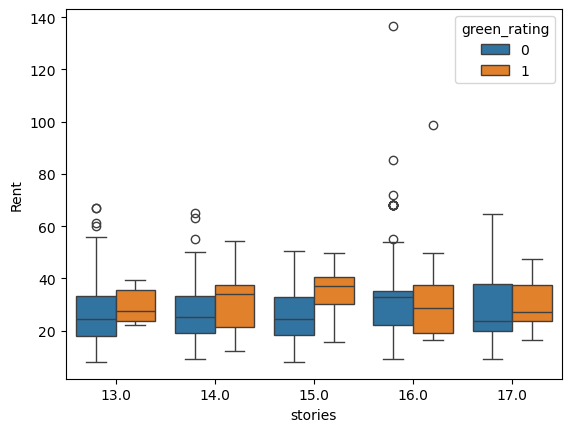

In [134]:
sns.boxplot(x=df[(df['stories'] >= 13) & (df['stories'] <= 17)]['stories'], y='Rent', hue='green_rating', data=df)

### Comparing green vs non-green rent for buildings of similar size to the new 250,000 sq foot building 

<Axes: xlabel='size', ylabel='Rent'>

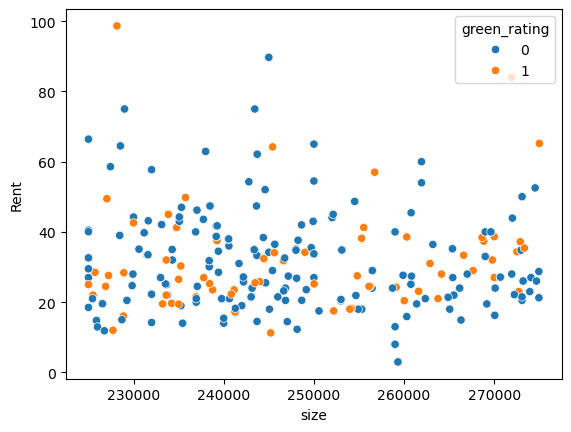

In [138]:
sns.scatterplot(x=df[(df['size'] >= 225000) & (df['size'] <= 275000)]['size'], y='Rent', hue='green_rating', data=df)

### Distribution of Rent by Green Status

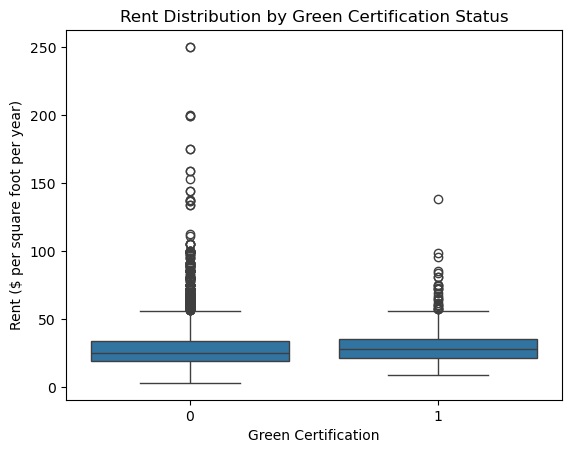

In [77]:
sns.boxplot(x='green_rating', y='Rent', data=df)
plt.title('Rent Distribution by Green Certification Status')
plt.xlabel('Green Certification')
plt.ylabel('Rent ($ per square foot per year)')
plt.show()

### Comparing green vs non-green rent across building age

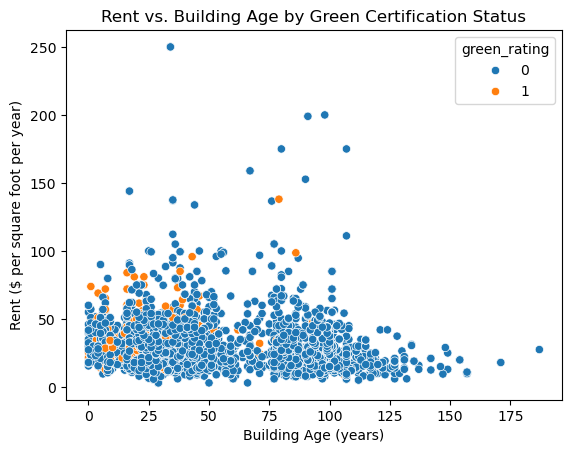

In [79]:
sns.scatterplot(x='age', y='Rent', hue='green_rating', data=df)
plt.title('Rent vs. Building Age by Green Certification Status')
plt.xlabel('Building Age (years)')
plt.ylabel('Rent ($ per square foot per year)')
plt.show()

### Comparing green vs non-green rent across different local market rents 

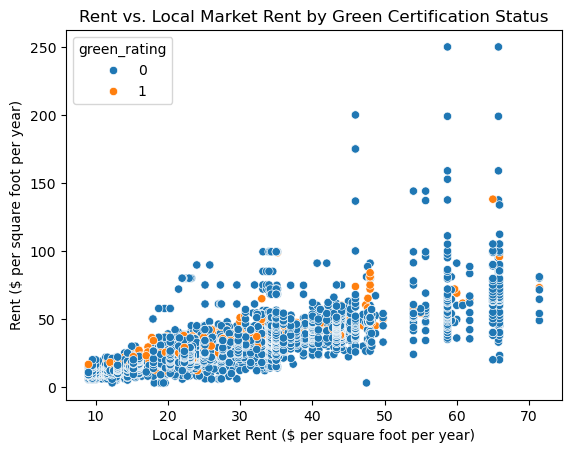

In [81]:
sns.scatterplot(x='cluster_rent', y='Rent', hue='green_rating', data=df)
plt.title('Rent vs. Local Market Rent by Green Certification Status')
plt.xlabel('Local Market Rent ($ per square foot per year)')
plt.ylabel('Rent ($ per square foot per year)')
plt.show()

### Comparing green vs non-green rent across different building sizes

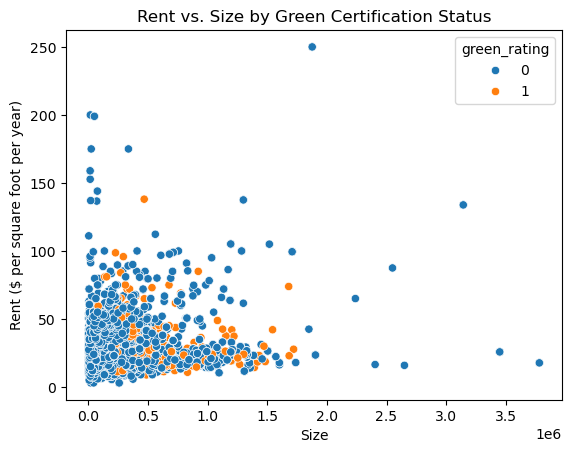

In [83]:
sns.scatterplot(x='size', y='Rent', hue='green_rating', data=df)
plt.title('Rent vs. Size by Green Certification Status')
plt.xlabel('Size')
plt.ylabel('Rent ($ per square foot per year)')
plt.show()

### Comparing green vs non-green rent controlling for building age, size, and market rent  

/var/folders/8y/vqcryym131n1m9tyx588x_nc0000gn/T/ipykernel_62950/1081615873.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['age_bin', 'size_bin', 'market_bin', 'green_rating'])['Rent'].median().unstack('green_rating')[:20]


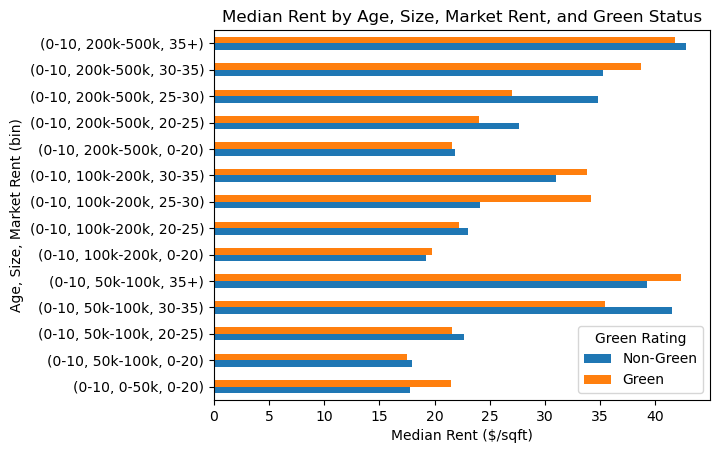

In [109]:
df['age_bin'] = pd.cut(df['age'], bins=[0, 10, 20, 30, 40, 50, 100], labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50+'])
df['size_bin'] = pd.cut(df['size'], bins=[0, 50000, 100000, 200000, 500000, 1000000], labels=['0-50k', '50k-100k', '100k-200k', '200k-500k', '500k+'])
df['market_bin'] = pd.cut(df['cluster_rent'], bins=[0, 20, 25, 30, 35, 50], labels=['0-20', '20-25', '25-30', '30-35', '35+'])

grouped = df.groupby(['age_bin', 'size_bin', 'market_bin', 'green_rating'])['Rent'].median().unstack('green_rating')[:20]
grouped.dropna(inplace=True)

grouped.plot(kind='barh')
plt.title('Median Rent by Age, Size, Market Rent, and Green Status')
plt.ylabel('Age, Size, Market Rent (bin)')
plt.xlabel('Median Rent ($/sqft)')
plt.legend(title='Green Rating', labels=['Non-Green', 'Green'])
plt.show()